# Working With Multiple SDFITS Files
------------------------------------

VEGAS data usually gets writen to separate SDFITS files, one per VEGAS bank. In this example we show how to load and work with data in multiple SDFITS files.

In [6]:
# Import the `dysh` function to get the example data and the class that handles GBT SDFITS data.
from dysh.util.data import get_example_data
from dysh.fits.gbtfitsload import GBTFITSLoad

## Data Retrieval

First, we download the example SDFITS data, if necessary.

In [2]:
filename = get_example_data("multifiles")

Will download data from: https://www.gb.nrao.edu/dysh/example_data//multifits/data/TRCO_230413_Ka.raw.vegas.tgz
100% [........................................................................] 75340671 / 75340671
Data is available in : /home/scratch/psalas/.cache/dysh/TRCO_230413_Ka.raw.vegas


## Data Loading

The data has been downloaded to the directory defined by your `XDG_CACHE_HOME` system variable, and if that variable is not defined, to the current working directory. If the download was succesful now you will see a directory called `TRCO_230413_Ka.raw.vegas` that contains four SDFITS files.

In [8]:
!ls $filename

TRCO_230413_Ka.raw.vegas.A.fits  TRCO_230413_Ka.raw.vegas.C.fits
TRCO_230413_Ka.raw.vegas.B.fits  TRCO_230413_Ka.raw.vegas.D.fits


Loading multiple SDFITS files is as simple as passing the directory name to the `GBTFITSLoad` constructor. However, be aware that this will try to load any files ending in `.fits` inside the directory, even if they are not SDFITS files.

In [9]:
sdfits = GBTFITSLoad(filename)

Loaded 4 FITS files


Now the summary will list the information for all of the SDFITS files loaded. There will be 4 IFs (spectral windows), one for each SDFITS file.

In [10]:
sdfits.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,32,1256-0547,0.0,Nod,1,28.0,26.5,4,2,60,2,160.975324,43.884984
1,33,1256-0547,0.0,Nod,2,28.0,26.5,4,2,60,2,161.174093,43.928449
2,34,1256-0547,0.0,Nod,1,32.0,30.5,4,2,60,2,161.589629,44.000491
3,35,1256-0547,0.0,Nod,2,32.0,30.5,4,2,60,2,161.783395,44.041622
4,36,1256-0547,0.0,Unknown,0,0.75,0.75,4,2,120,2,162.124052,44.100404
5,37,1256-0547,0.0,Nod,1,35.5,34.5,3,2,60,2,162.611075,44.183661
6,38,1256-0547,0.0,Nod,2,35.5,34.5,3,2,60,2,162.896506,44.237997
7,39,1256-0547,0.0,Nod,1,38.5,37.5,3,2,60,2,163.333508,44.306385
8,40,1256-0547,0.0,Nod,2,38.5,37.5,3,2,60,2,163.529285,44.343704
9,41,1256-0547,0.0,Nod,1,32.0,30.5,4,2,60,2,164.941425,44.559629


## Data Reduction

Data reduction works as with any other GBT SDFITS file.

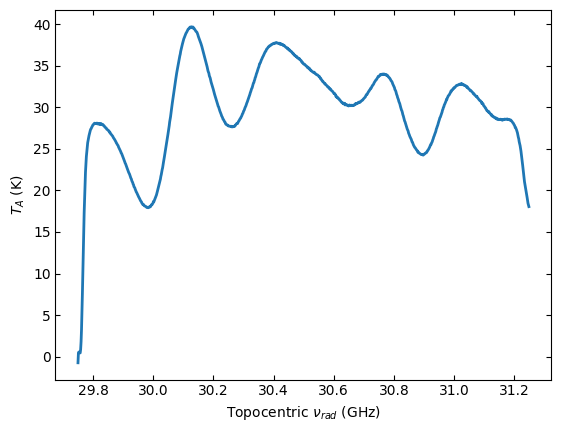

In [19]:
sbn = sdfits.subbeamnod(scan=46, fdnum=1, ifnum=0, weights='tsys', method='scan')
ta = sbn.timeaverage(weights='tsys')
ta.plot(xaxis_unit="GHz")